<a href="https://colab.research.google.com/github/princeKike27/Radio-Signals-from-Outer-Space-Classifier/blob/main/Radio_Signals_from_Outer_Space_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Radio Signals from Outer Space Classifier

- I'm going to use 2D Spectograms from Deep Space Radio Signals collected by the SETI *(Search for Extraterristrial Intelligence)* Institute. SETI uses the  Allen Telescope to  scan the star systems of known *ExoPlanets* at various radio frequencies, in order,  to detect faint but consistent radio signals (narrow band waves) from these systems.

  - By treating the 2D Spectograms as images I'm going to build and train a Neural Network that classifies each radio signal into 1 of 4 categories.


<br>

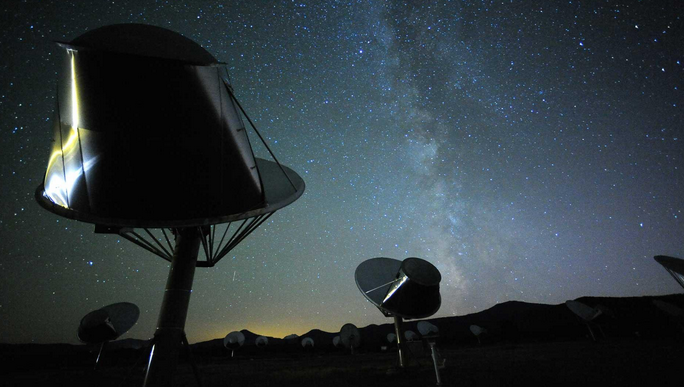

<br>




In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading Data from Google Drive

In [2]:
# connect to google drive
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# go to Project Dir
%cd '/content/gdrive/MyDrive/Data Science/Projects/Portafolio/Classifying Radio Signals from Outer Space'

# check contents
%ls 

/content/gdrive/MyDrive/Data Science/Projects/Portafolio/Classifying Radio Signals from Outer Space
'CNN - Radio Signals from Outer Space Classifier.ipynb'   test_labels.csv
'Radio Signals from Outer Space Classifier.ipynb'         train_images.csv
 test_images.csv                                          train_labels.csv


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Image Data

<br>

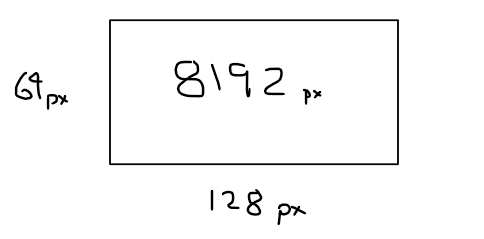

<br>

- Each *Spectogram* image was converted into raw pixel intensity values and Normalized, now each pixel value ranges between $0$ and $1$

  - Each *Spectogram* is $64 \times 128 ⟶ 8192$ pixels
  - Since the Images were converted into 2D *Spectograms* their Channel == 1, or Gray Scale

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### $X$ Inputs

<br>

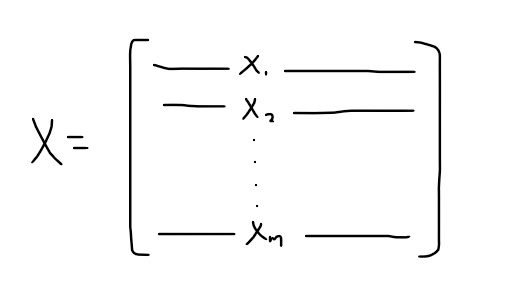

<br>

- Each Row in X_Train and X_Test corresponds to a *Spectogram* Example and each Column to a Pixel Value

  - $X$ needs to be TRANSPOSED so it can be fed into the Neural Network its new dimensions will be $(8192 \times m)$

    - Each Column will now be a *Spectogram* Example and each Row will correspond to a Pixel Value

<br>

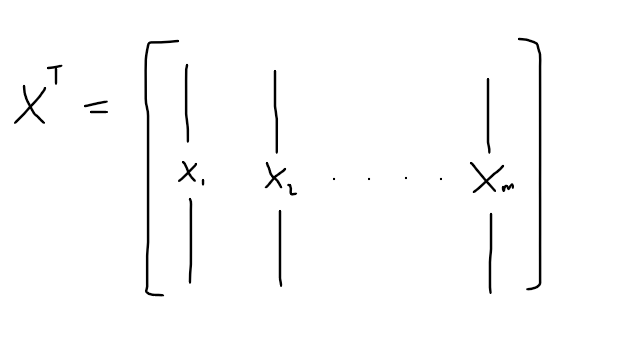

<br>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $X$ Train

In [4]:
# load train images
train_images = pd.read_csv('train_images.csv', header=None)

train_images

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510
3,0.705882,0.674510,0.654902,0.678431,0.666667,0.662745,0.678431,0.662745,0.686275,0.686275,...,0.639216,0.662745,0.631373,0.643137,0.705882,0.662745,0.705882,0.666667,0.654902,0.631373
4,0.647059,0.729412,0.701961,0.674510,0.611765,0.698039,0.713726,0.662745,0.701961,0.674510,...,0.639216,0.670588,0.705882,0.674510,0.721569,0.694118,0.674510,0.705882,0.749020,0.729412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0.631373,0.666667,0.627451,0.607843,0.639216,0.615686,0.623529,0.588235,0.611765,0.635294,...,0.592157,0.611765,0.596078,0.607843,0.639216,0.658824,0.643137,0.627451,0.607843,0.647059
3196,0.662745,0.627451,0.686275,0.615686,0.639216,0.717647,0.674510,0.643137,0.729412,0.701961,...,0.603922,0.627451,0.662745,0.654902,0.701961,0.701961,0.647059,0.615686,0.635294,0.623529
3197,0.647059,0.650980,0.643137,0.596078,0.529412,0.568627,0.607843,0.631373,0.635294,0.658824,...,0.631373,0.658824,0.639216,0.647059,0.619608,0.603922,0.603922,0.643137,0.619608,0.564706
3198,0.694118,0.709804,0.580392,0.650980,0.631373,0.686275,0.623529,0.650980,0.678431,0.666667,...,0.658824,0.674510,0.615686,0.686275,0.670588,0.619608,0.678431,0.682353,0.623529,0.647059


In [5]:
# create X_train array
X_train = np.array(train_images)

# check shape
print(f'X_train shape: {X_train.shape}', '\n')

X_train

X_train shape: (3200, 8192) 



array([[0.631373, 0.623529, 0.713726, ..., 0.694118, 0.658824, 0.666667],
       [0.72549 , 0.752941, 0.74902 , ..., 0.698039, 0.701961, 0.72549 ],
       [0.717647, 0.701961, 0.713726, ..., 0.678431, 0.737255, 0.67451 ],
       ...,
       [0.647059, 0.65098 , 0.643137, ..., 0.643137, 0.619608, 0.564706],
       [0.694118, 0.709804, 0.580392, ..., 0.682353, 0.623529, 0.647059],
       [0.631373, 0.611765, 0.701961, ..., 0.65098 , 0.658824, 0.686275]])

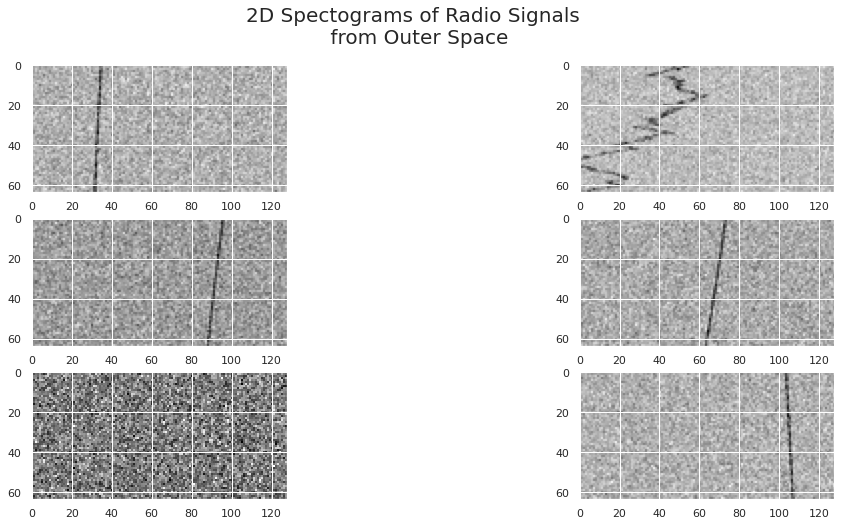

In [20]:
# plot 6 random Spectograms
fig = plt.figure(figsize=(18, 8))

for i in range(1, 7):
  # draw subplot
  plt.subplot(3, 2, i)
  # select random spectogram
  spectogram = X_train[np.random.randint(0, X_train.shape[0]), :]
  # reshape spectogram
  spectogram = spectogram.reshape(64, 128)
  # multiply by 255 pixels >> Unnormalize
  spectogram *= 255
  # plot image
  plt.imshow(spectogram, cmap='gray')

plt.suptitle('2D Spectograms of Radio Signals \n from Outer Space', size=20)

plt.show()

- Each of the six 2D *Spectograms* shown above correspond to 1 of the 4 Classes of Radio Signals:

  - *Squiggle*
  - *Narrow Band*
  - *Noise*
  - *Narrow Band DRD*

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $X$ Test

In [6]:
# load test images
test_images = pd.read_csv('test_images.csv', header=None)

test_images

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.686275,0.725490,0.737255,0.694118,0.658824,0.674510,0.643137,0.752941,0.678431,0.654902,...,0.674510,0.709804,0.643137,0.674510,0.682353,0.658824,0.741176,0.658824,0.705882,0.701961
1,0.615686,0.631373,0.705882,0.678431,0.698039,0.639216,0.619608,0.654902,0.678431,0.682353,...,0.662745,0.674510,0.674510,0.721569,0.709804,0.666667,0.619608,0.709804,0.705882,0.682353
2,0.670588,0.690196,0.698039,0.647059,0.650980,0.670588,0.721569,0.701961,0.647059,0.678431,...,0.666667,0.670588,0.682353,0.698039,0.662745,0.619608,0.650980,0.662745,0.717647,0.650980
3,0.682353,0.650980,0.682353,0.670588,0.690196,0.701961,0.721569,0.709804,0.690196,0.650980,...,0.694118,0.737255,0.733333,0.717647,0.674510,0.678431,0.745098,0.705882,0.709804,0.717647
4,0.647059,0.690196,0.717647,0.666667,0.654902,0.639216,0.654902,0.674510,0.682353,0.674510,...,0.662745,0.682353,0.698039,0.705882,0.662745,0.678431,0.682353,0.725490,0.670588,0.658824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.603922,0.662745,0.658824,0.678431,0.647059,0.654902,0.639216,0.631373,0.709804,0.674510,...,0.729412,0.686275,0.635294,0.690196,0.580392,0.592157,0.639216,0.650980,0.682353,0.654902
796,0.549020,0.678431,0.615686,0.549020,0.635294,0.580392,0.674510,0.556863,0.623529,0.650980,...,0.647059,0.650980,0.596078,0.596078,0.654902,0.635294,0.647059,0.549020,0.623529,0.631373
797,0.705882,0.686275,0.588235,0.670588,0.717647,0.654902,0.662745,0.662745,0.662745,0.647059,...,0.678431,0.717647,0.717647,0.666667,0.682353,0.666667,0.690196,0.658824,0.650980,0.662745
798,0.643137,0.654902,0.650980,0.674510,0.631373,0.615686,0.639216,0.615686,0.670588,0.647059,...,0.603922,0.619608,0.623529,0.552941,0.596078,0.611765,0.643137,0.588235,0.611765,0.666667


In [7]:
# create X_test array
X_test = np.array(test_images)

# check shape
print(f'X_test shape: {X_test.shape}', '\n')

X_test

X_test shape: (800, 8192) 



array([[0.686275, 0.72549 , 0.737255, ..., 0.658824, 0.705882, 0.701961],
       [0.615686, 0.631373, 0.705882, ..., 0.709804, 0.705882, 0.682353],
       [0.670588, 0.690196, 0.698039, ..., 0.662745, 0.717647, 0.65098 ],
       ...,
       [0.705882, 0.686275, 0.588235, ..., 0.658824, 0.65098 , 0.662745],
       [0.643137, 0.654902, 0.65098 , ..., 0.588235, 0.611765, 0.666667],
       [0.631373, 0.658824, 0.654902, ..., 0.639216, 0.639216, 0.658824]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $X$ Transpose

- We need to Transpose *X_train* and *X_test* arrays so they can be fed into the Neural Network, each column will be now be a *Spectogram* Image from a Radio Signal

In [8]:
# create X_train Transpose
X_train_T = X_train.T

# check shape
print(f'X_train Transpose shape: {X_train_T.shape}', '\n')

X_train_T

X_train Transpose shape: (8192, 3200) 



array([[0.631373, 0.72549 , 0.717647, ..., 0.647059, 0.694118, 0.631373],
       [0.623529, 0.752941, 0.701961, ..., 0.65098 , 0.709804, 0.611765],
       [0.713726, 0.74902 , 0.713726, ..., 0.643137, 0.580392, 0.701961],
       ...,
       [0.694118, 0.698039, 0.678431, ..., 0.643137, 0.682353, 0.65098 ],
       [0.658824, 0.701961, 0.737255, ..., 0.619608, 0.623529, 0.658824],
       [0.666667, 0.72549 , 0.67451 , ..., 0.564706, 0.647059, 0.686275]])

In [9]:
# create X_test Transpose
X_test_T = X_test.T

# check shape
print(f'X_test Transpose shape: {X_test_T.shape}', '\n')

X_test_T

X_test Transpose shape: (8192, 800) 



array([[0.686275, 0.615686, 0.670588, ..., 0.705882, 0.643137, 0.631373],
       [0.72549 , 0.631373, 0.690196, ..., 0.686275, 0.654902, 0.658824],
       [0.737255, 0.705882, 0.698039, ..., 0.588235, 0.65098 , 0.654902],
       ...,
       [0.658824, 0.709804, 0.662745, ..., 0.658824, 0.588235, 0.639216],
       [0.705882, 0.705882, 0.717647, ..., 0.65098 , 0.611765, 0.639216],
       [0.701961, 0.682353, 0.65098 , ..., 0.662745, 0.666667, 0.658824]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### $Y$ Labels

- The Labels consist of 4 Classes of Radio Signals, represented as One Hot Encoded Vectors:

  - $0 ⟶$ Squiggle
    - $[1, 0, 0 , 0]$

  - $1 ⟶ $ Narrow Band
    - $[0, 1, 0, 0]$

  - $2 ⟶$ Noise
    - $[0, 0, 1, 0]$

  - $3 ⟶$ Narrow Band DRD
    - $[0, 0, 0, 1]$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### $Y$ Train

- $Y$ Train needs to be Transposed so it can be used in the Neural Network

In [22]:
# load train labels
train_labels = pd.read_csv('train_labels.csv', header=None)

train_labels

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3195,0.0,1.0,0.0,0.0
3196,0.0,1.0,0.0,0.0
3197,0.0,1.0,0.0,0.0
3198,0.0,1.0,0.0,0.0


In [23]:
# create Y_train array
Y_train = np.array(train_labels)

# check shape
print(f'Y_train shape: {Y_train.shape}', '\n')

Y_train

Y_train shape: (3200, 4) 



array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [28]:
# create Y_train Transpose
Y_train_T = Y_train.T

# check shape
print(f'Y_train Transpose shape: {Y_train_T.shape}', '\n')

Y_train_T

Y_train Transpose shape: (4, 3200) 



array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Each column of *Y_train* Transpose corresponds to a Radio Signal Label

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




#### $Y$ Test


In [24]:
# load test labels
test_labels = pd.read_csv('test_labels.csv', header=None)

test_labels

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
795,0.0,1.0,0.0,0.0
796,0.0,1.0,0.0,0.0
797,0.0,1.0,0.0,0.0
798,0.0,1.0,0.0,0.0


In [25]:
# create Y_test array
Y_test = np.array(test_labels)

# check shape
print(f'Y_test shape: {Y_test.shape}', '\n')

Y_test

Y_test shape: (800, 4) 



array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Nerual Network Model

- Neural Network Architecture

<br>

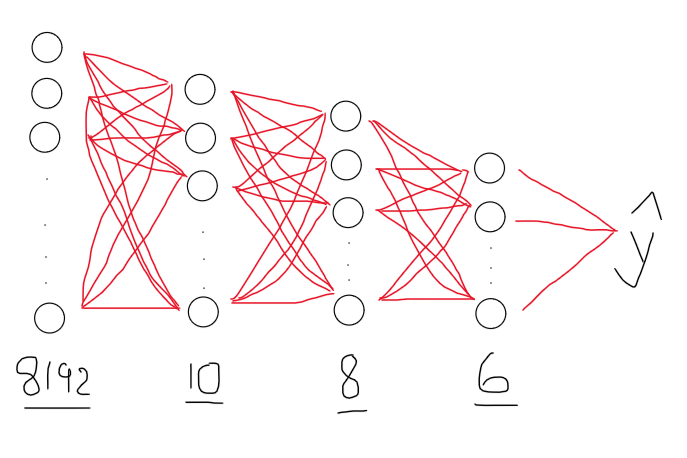

<br>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)




### Forward Propagation

- We Activate the Neurons from Left to Right with Randomized Values of Parameters $\vec{W}$ and $b$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


#### First Hidden Layer

<br>

- $A^{[0]} ⟶ $ Input Layer:  
  - $A^{[0]} ⟶ (8192 \times m)$

<br>

- $\vec{w^{[1]}} ⟶$ Initialized with Random Values
  - $\vec{w^{[1]}} ⟶ (10 \times 8192)$

<br>

- $b^{[1]} ⟶$ Initialized with Random Values
  - $b^{[1]} ⟶ (10 \times 1)$

<br>

$$ Z^{[1]}_{(10 \times m)} = \vec{w}^{[1]}_{(10 \times 8192)} \times A^{[0]}_{(8192 \times m)} + b^{[1]}_{(10 \times 1)} $$

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


<br>

- $\vec{w}^{[1]}$ 

In [32]:
# initialize W_1 with random values
W_1 = np.random.rand(10 , 8192) - 0.5

# check shape
print(f'W_1 shape: {W_1.shape}', '\n')

# check first 5 cols
W_1[:, 0:5]

W_1 shape: (10, 8192) 



array([[-0.06600437,  0.25534476, -0.32578507, -0.00891995, -0.13395802],
       [ 0.16377862, -0.37394537,  0.19681426,  0.24784261, -0.25364817],
       [ 0.46468067, -0.29481952, -0.20670525,  0.07994631, -0.1926387 ],
       [-0.16588452, -0.43548935,  0.05835281,  0.40037824,  0.18537158],
       [ 0.04561683,  0.46845055,  0.17546703, -0.1258637 , -0.02621811],
       [ 0.21017793,  0.24007269, -0.06600281,  0.36597189,  0.10384555],
       [-0.03616912, -0.04166299, -0.37469761,  0.19775741, -0.35225134],
       [-0.30278316, -0.21436316, -0.06059043,  0.25704034,  0.34207747],
       [ 0.39020831, -0.07040827,  0.11106688, -0.02813238,  0.40686324],
       [-0.32172817, -0.13880096, -0.01992493, -0.26854981,  0.09772663]])

<br>

- $b^{[1]}$

In [33]:
# initialize b_1 with random values
b_1 = np.random.rand(10, 1) - 0.5

# check shape
print(f'b_1 shape: {b_1.shape}', '\n')

b_1

b_1 shape: (10, 1) 



array([[ 0.06226867],
       [-0.12218977],
       [-0.3823693 ],
       [-0.49523879],
       [-0.14581785],
       [-0.14526276],
       [-0.44030984],
       [-0.13917278],
       [ 0.49853894],
       [-0.39682985]])

<br>

- $Z^{[1]}$

In [40]:
# Z_1 >> np.dot(W_1, A_0) + b_1
Z_1 = np.dot(W_1, X_train_T) + b_1

# check shape
print(f'Z_1 shape: {Z_1.shape}', '\n')

# check first 4 cols
Z_1[:, 0:4]

Z_1 shape: (10, 3200) 



array([[ 28.31330528,  32.2995712 ,  31.14193936,  30.59181174],
       [ 10.67504823,  15.44063173,  14.72465599,  14.23812615],
       [ 20.11722094,  23.00664914,  21.53718627,  20.12511885],
       [ 23.59843302,  25.39874239,  23.97413581,  23.9598877 ],
       [  8.69544128,   6.02923594,   8.31969503,   7.49900215],
       [ -2.4051482 ,  -2.34296109,  -1.62540333,  -2.37861709],
       [-18.57733426, -21.23128203, -20.82994592, -19.08586699],
       [ 38.65794489,  41.62919527,  41.45024197,  40.58524862],
       [  3.04019133,   2.14566306,   2.90397715,   1.98653458],
       [-17.14934468, -18.85534545, -20.63163071, -19.25193964]])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Activation Function of Layer 1

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)